# 1. Understanding the problem and data

Binary Classification is a well known problem which can be solved with machine learning algorithms  
I will use some popular classification algorithms and based on prediction metrics, will choose the best among them  
Reference : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

I will be importing the python libraries 
1) pandas to handle data in dataframes  
2) sklearn to preprocess data, for model building, and evaluation  
3) matplotlib for data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Instead of doing a test train split, I will use a StratifiedKFold Cross Validation.  
Reference : https://machinelearningmastery.com/data-leakage-machine-learning/

In [2]:
mushrooms = pd.read_csv("mushrooms.csv")

In [3]:
# exploring the data
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,p,k,s,e,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,d
6515,p,x,s,n,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
6141,p,f,y,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
2764,e,f,f,n,t,n,f,c,b,u,...,s,g,p,p,w,o,p,n,v,d
438,e,b,y,y,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,m


In [4]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,...,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,3365,2956,2602,1823,3802,2833,6331,5451,4496,1398,...,3944,3573,3502,6499,6340,5976,3154,1936,3218,2513


In [5]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 7873 to 7270
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     6499 non-null   object
 1   cap-shape                 6499 non-null   object
 2   cap-surface               6499 non-null   object
 3   cap-color                 6499 non-null   object
 4   bruises                   6499 non-null   object
 5   odor                      6499 non-null   object
 6   gill-attachment           6499 non-null   object
 7   gill-spacing              6499 non-null   object
 8   gill-size                 6499 non-null   object
 9   gill-color                6499 non-null   object
 10  stalk-shape               6499 non-null   object
 11  stalk-root                6499 non-null   object
 12  stalk-surface-above-ring  6499 non-null   object
 13  stalk-surface-below-ring  6499 non-null   object
 14  stalk-color-above-rin

Creating frequency plots for each column using subplots   
Reference : https://stackoverflow.com/questions/28218698/how-to-iterate-over-columns-of-pandas-dataframe-to-run-regression  
Reference2: https://stackoverflow.com/questions/62972488/plotting-with-subplots-in-a-loop


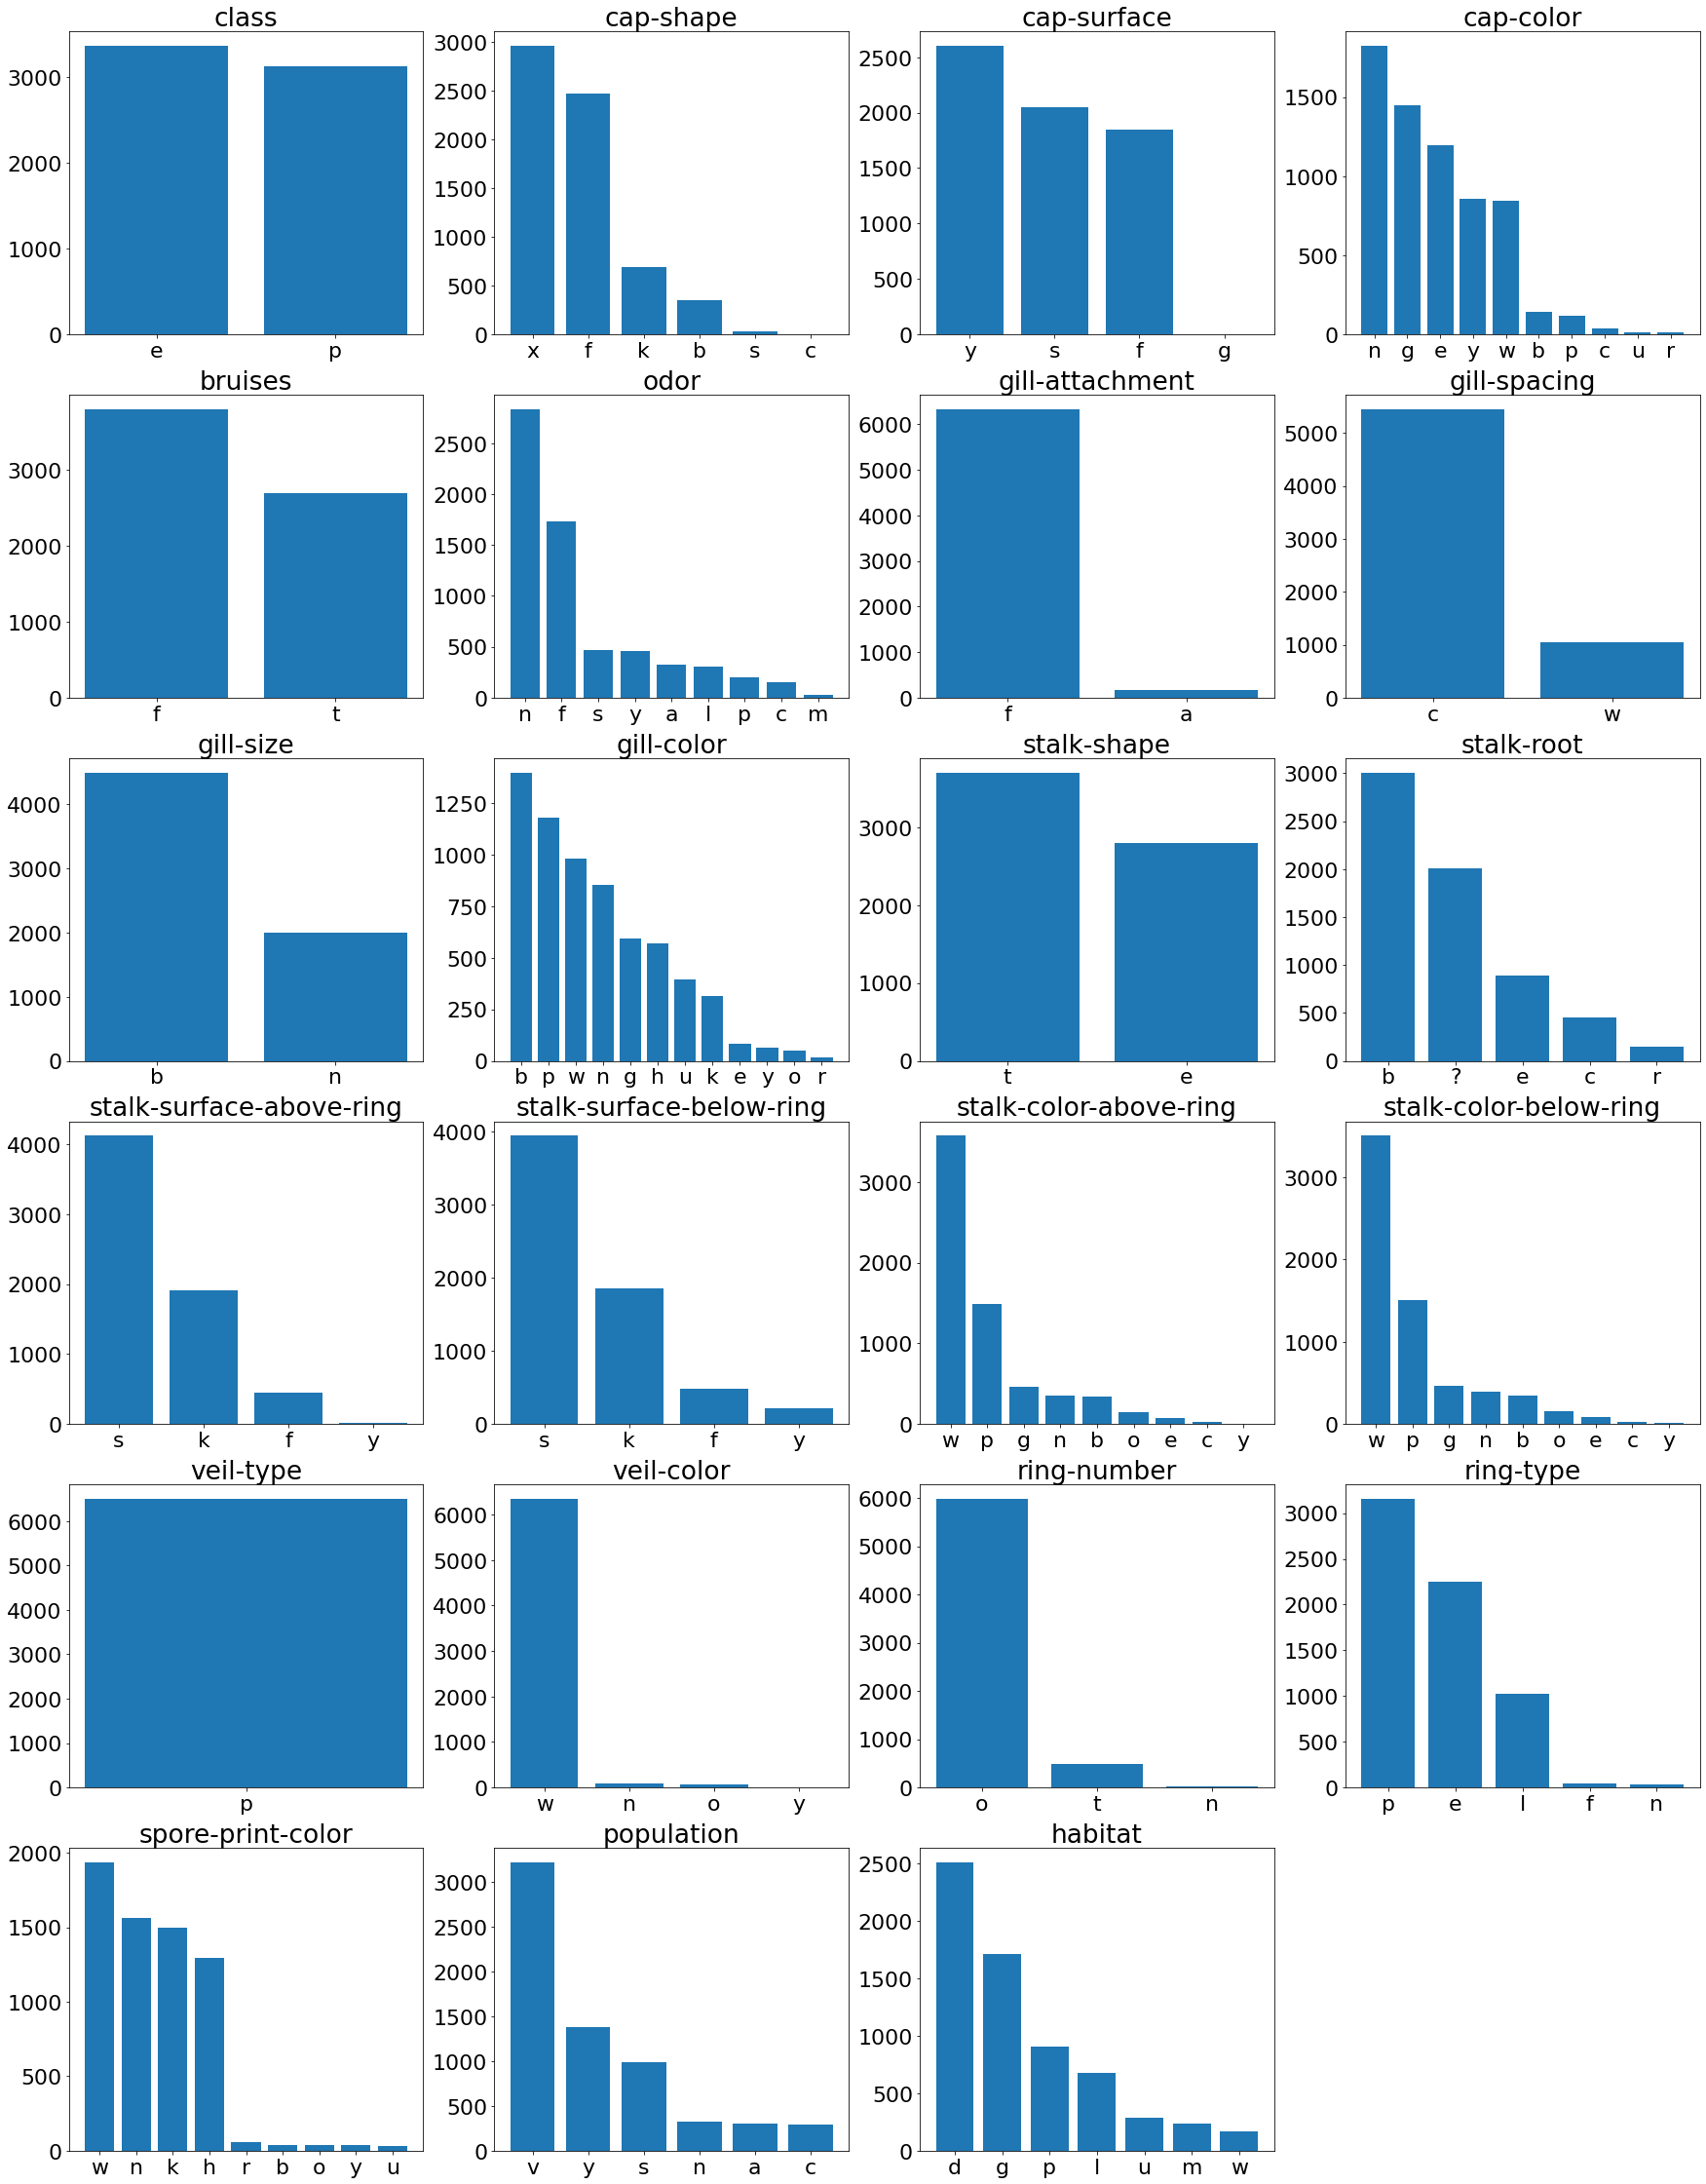

In [6]:
# plot settings : figsize and font size
plt.figure(figsize=(30,40))
plt.rcParams.update({'font.size': 22})

# looping over each trip type and finding top 5 depts assosciated
for count, column in enumerate(mushrooms.columns):
    x = train[column].value_counts(sort=True)
    plt.subplot(6, 4, count+1)
    plt.bar(x.index, x.values)
    plt.title(f"{column}")

## Inference :

0. We need a model which can predict 'class' based on 22 features
1. The label count of class (p, e) are almost the same, so this dataset is close to a balanced binary classification
2. All columns are of data type "object" which must be converted to integer
2. **'veil-type'** column has only one value, so it can be dropped from the analysis
3. We have too many null values in the feature **stalk-root** with '?' values These should be dealt with in preprocessing  
4. The values in almost all columns have skewed frequency - i dont think this is a problem, but im not sure
5. All things considered, this dataset is mostly clean

# 2. Correlation among columns

Lets see if these feature have any correlation among them  
Reference : https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9  

I am using label encoder to convert object data to integerer data  
Reference 1 : https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b  
Reference 2 : https://stackoverflow.com/questions/39409866/correlation-heatmap

In [7]:
mushrooms.drop('veil-type', axis=1, inplace=True)

In [8]:
# label encoding all columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = le.fit_transform(train[col])
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,1,3,2,2,0,7,1,0,1,0,...,2,1,6,7,2,1,0,7,4,0
6515,1,5,2,4,0,2,1,0,1,0,...,1,2,7,7,2,1,0,7,4,4
6141,1,2,3,2,0,8,1,0,1,0,...,2,2,6,7,2,1,0,7,4,2
2764,0,2,0,4,1,5,1,0,0,9,...,2,2,3,6,2,1,4,3,4,0
438,0,0,3,9,1,3,1,0,0,4,...,2,2,7,7,2,1,4,3,2,3


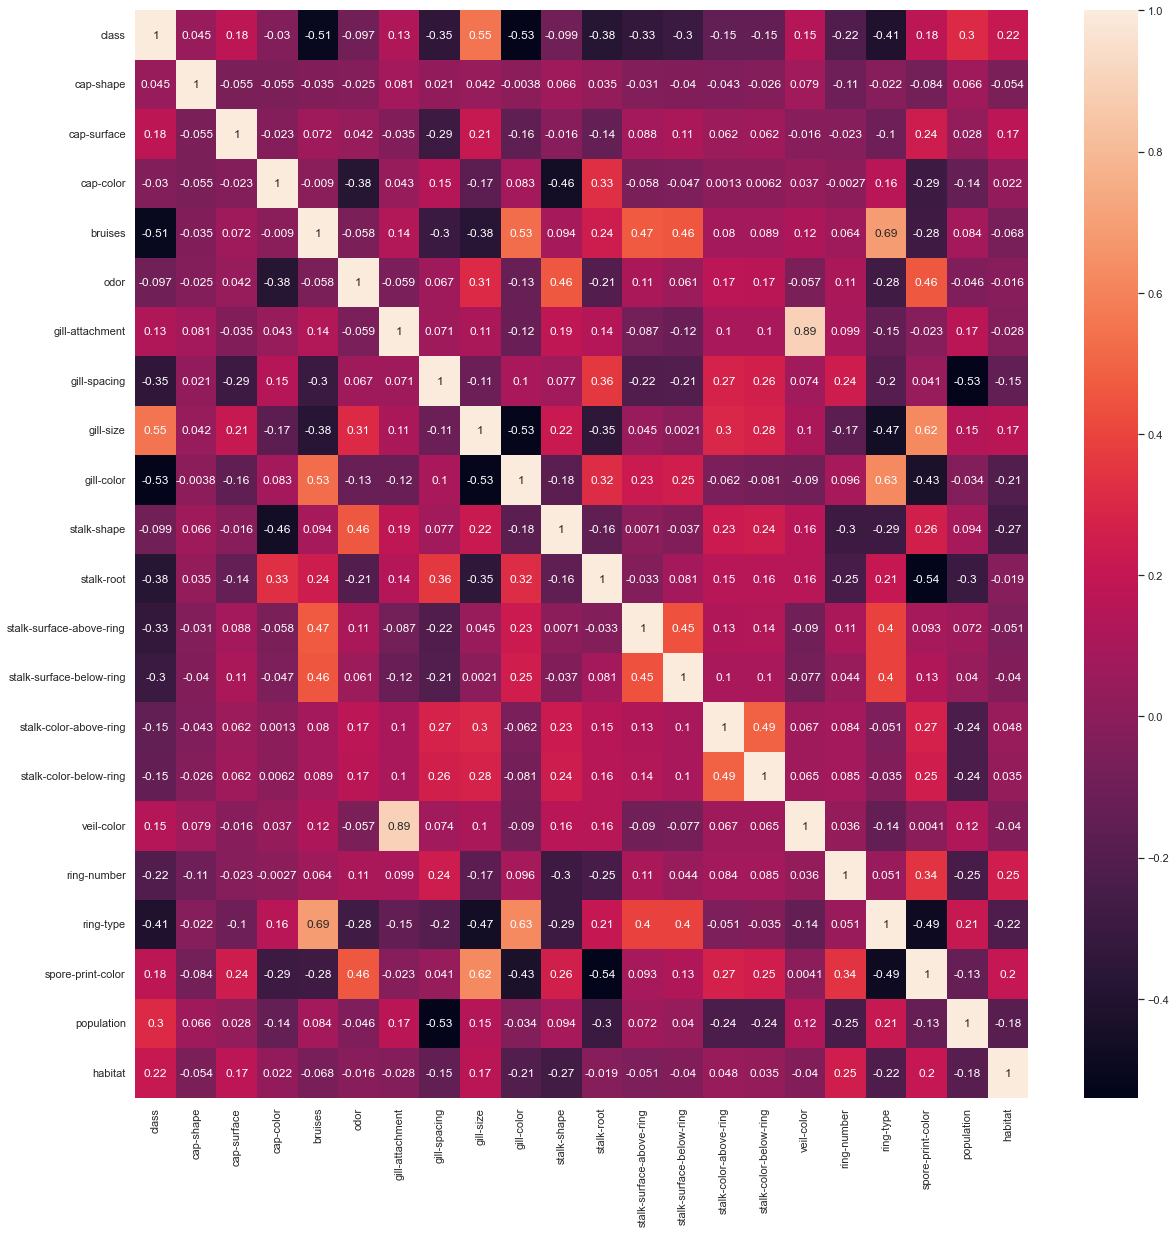

In [30]:
# Correlation map

# attempt 1 
# plt.matshow(train.corr())
# plt.show()

# attempt 2 
# corr = train.corr()
# f, ax = plt.subplots(figsize=(15, 8))
# import seaborn as sns
# import numpy as np
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(10, 100, as_cmap=True),square=True, ax=ax)

# attempt 3
# importing seaborn as it has a simple function for correlation map
import seaborn as sns
sns.set(rc={"figure.figsize":(20, 20)})
sns.heatmap(corr, annot=True)
plt.show()

## Inference :

1. There is high correlation between 'class' and 'bruises', 'gill-size', 'gill-color'  
2. Also, there is significant correlation between multiple features  
3. Principal component analysis can be used for dimensionality reduction when there is correlation between features  
   Reference : https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e
4. But the dataset is not too big, so I will skip PCA, so as to not lose any information

# END